In [20]:
from vaastav.data_loader import DataLoader
from vaastav.gameweek import Gameweek
from vaastav.player import Player

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_loader = DataLoader()

In [ ]:
# Sample main
player_id = '283'
player_name = 'Mohamed Salah'
gw_id = '1'

gw_data = data_loader.get_gw_data(gw_id)
understat_data = data_loader.get_understat_data(player_id)
players_raw = data_loader.get_players_raw()

player_raw = data_loader.get_player_raw(player_id)
player_data = data_loader.get_player_data(player_id)

player = Player(name=player_name, data=player_data, raw=player_raw)

gameweek = Gameweek(num=gw_id, data=gw_data)
gw_player = gameweek.get_player_data(player_name)

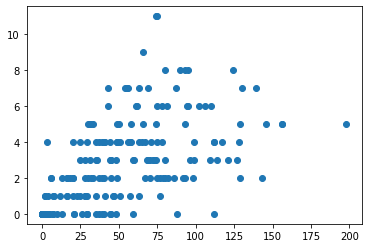

In [15]:
# Loads graph to compare two raw stats
x = data_loader.get_raw_stat_by_pos('2',"total_points").astype(int)
y = data_loader.get_raw_stat_by_pos('2',"yellow_cards").astype(float)

plt.scatter(x, y)
plt.show()

In [23]:
stat_by_pos = data_loader.get_raw_stat_by_pos('4', "goals_scored")
print(stat_by_pos)

['4' '11' '0' '15' '0' '0' '0' '4' '6' '0' '0' '0' '0' '1' '20' '9' '0'
 '0' '6' '5' '4' '6' '0' '7' '1' '1' '0' '4' '0' '5' '2' '0' '0' '1' '0'
 '2' '0' '1' '14' '0' '0' '0' '5' '3' '5' '4' '4' '1' '0' '2' '0' '0' '0'
 '11' '7' '9' '36' '9' '0' '1' '6' '0' '0' '18' '0' '10' '3' '0' '1' '8'
 '10' '2' '0' '2' '5' '1' '0' '0' '0' '30' '0' '0' '1' '8' '5' '3' '0' '0'
 '0' '0' '1' '0' '2']


In [55]:
# Loads all players basic data
data = data_loader.get_players_raw()
pd.DataFrame(data)
    


,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,clean_sheets_per_90,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
1,8,15,634,100,100,13,0.39,84450,None,,...,38,153,942505,0,832169,0,1.4,31.9,Xhaka,4
2,0,0,27,0,0,0,0.0,153256,None,,...,233,6,202760,0,279536,0,0.0,1.5,Elneny,0
3,0,0,120,None,None,0,0.0,156074,None,,...,118,21,23338,0,27980,0,0.0,5.0,Holding,0
4,0,6,468,100,100,11,0.4,167199,None,,...,90,86,110171,0,141958,0,0.3,18.3,Partey,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0,6,122,100,100,5,0.47,430871,None,,...,46,39,78699,0,65702,0,0.2,7.4,Cunha,1
775,1,0,196,100,100,5,0.35,151086,None,,...,188,35,4325,0,2304,0,0.4,7.8,Lemina,2
776,0,3,57,100,100,3,0.35,88484,2,,...,122,27,50058,0,45943,0,0.1,5.5,Sarabia,3
777,0,0,45,None,None,0,0.0,79602,None,,...,32,6,6232,0,2500,0,0.3,1.5,Bentley,0


In [92]:
data = data_loader.get_players_raw()
budget = 1000
positions = {1: 'GK', 2: 'DEF', 3: 'MID', 4: 'FWD'}
max_positions = {"FWD": 4, "MID": 5, "DEF": 6, "GK": 2}


column_names = data[0, :]

# Find the indices of the columns you want
columns_to_extract = ['now_cost', 'id', 'team', 'element_type', 'total_points']
column_indices = [np.where(column_names == col)[0][0] for col in columns_to_extract]

# Extract the desired columns into a new array
data = data[1:, column_indices].astype(int)

k_data = data[:, [1,4]]

table = np.zeros((len(k_data) + 1, budget + 1))
table.shape

(779, 1001)

In [ ]:
from vaastav.data_loader import DataLoader
from team_selector import TeamSelector
import numpy as np

PLAYERS = 16
POSITIONS = {1: 'GK', 2: 'DEF', 3: 'MID', 4: 'FWD'}
MAX_POSITIONS = {"FWD": 4, "MID": 5, "DEF": 6, "GK": 2}

data_loader = DataLoader()
data = data_loader.get_players_raw()

team_selector = TeamSelector(data)
team_selector.set_initial_population()

: 